<a id="section_CART"></a> 
## Workshop Final DS Digital House

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

In [3]:
# importando bases de treino e teste
df_test = pd.read_csv(r'https://raw.githubusercontent.com/faustinothiagos/Workshop_Final_DS_Digital_House_2022/main/DataSet/test.csv')
df_train = pd.read_csv(r'https://raw.githubusercontent.com/faustinothiagos/Workshop_Final_DS_Digital_House_2022/main/DataSet/train.csv')

c:\Users\Luquinhas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# incluindo colunas para sperar os dados da mesma maneira que estavam originalmente
df_train['test'] = 0
df_test['test'] = 1

# incluindo coluna de score com nan nos dados de teste
df_test['Credit_Score'] = np.nan

In [5]:
# concatenando os datasets ja que eles tem as mesmas colunas

df_total = pd.concat([df_train, df_test], ignore_index = True)

In [6]:
print('dados de treino: ', df_train.shape)
print('dados de teste: ', df_test.shape)
print('todos os dados agrupados: ', df_total.shape)

dados de treino:  (100000, 29)
dados de teste:  (50000, 29)
todos os dados agrupados:  (150000, 29)


## Colunas dataset:

* ID - Identificador de entrada
* Customer_ID - ID cliente
* Month - Mês do ano
* Name - nome do cliente
* Age - Idade Cliente
* SSN - Social Security Number (CPF no Brasil)
* Occupation - Ocupação do cliente
* Annual_Income - renda anual
* Monthly_Inhand_Salary - Salario mensal do cliente
* Num_Bank_Accounts - quantidade de contas em bancos
* Num_Credit_Card - quantidade de cartões de crédito
* Interest_Rate - taxa de juros cartão de crédito
* Num_of_Loan - Quantidade de empréstimos feitos no banco
* Type_of_Loan - tipo de empréstimo feito pelo cliente
* Delay_from_due_date - qtd. de dias de atraso pagamento cartão
* Num_of_Delayed_Payment - Média de pagamentos atrasado pelo cliente
* Changed_Credit_Limit - Variação percentual de limite do cartão de crédito
* Num_Credit_Inquiries - Quantidade de "cobranças" no cartão
* Credit_Mix - mix de crédito do cliente
* Outstanding_Debt - restante à ser pago da dívida
* Credit_Utilization_Ratio - Taxa de utlização do cartão de crédito
* Credit_History_Age - Tempo de histórico de crédito do cliente
* Payment_of_Min_Amount - Pagamento minimo
* Total_EMI_per_month - Pagamento fixo em dolares por mes
* Amount_invested_monthly - Quantidade de dinheiro investido pelo cliente mensalmente
* Payment_Behaviour - Comportamento de pagamento cliente
* Monthly_Balance - Saldo Mensal Cliente
* Credit_Score - Target
* test - coluna utilizada para separar o dataset nos dados de treino e teste

In [7]:
# quantidade % de dados faltantes
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title("% de dados faltantes")
        plt.show()
    else:
        print('No NAs found')

In [8]:
colunas = df_total.columns

for coluna in colunas:
    print('Variavel: ', coluna)
    print(20*'-')
    print(df_total[coluna].value_counts(dropna=False))

Variavel:  ID
--------------------
0x6470     1
0xddab     1
0x17832    1
0x125d2    1
0x1f57b    1
          ..
0x1a1a4    1
0x10557    1
0x1a955    1
0x19cf5    1
0x15db2    1
Name: ID, Length: 150000, dtype: int64
Variavel:  Customer_ID
--------------------
CUS_0x80ed    12
CUS_0x4edc    12
CUS_0x534a    12
CUS_0x3fe8    12
CUS_0x5049    12
              ..
CUS_0xb808    12
CUS_0x2f86    12
CUS_0x353a    12
CUS_0x5909    12
CUS_0xa46c    12
Name: Customer_ID, Length: 12500, dtype: int64
Variavel:  Month
--------------------
May          12500
April        12500
January      12500
February     12500
March        12500
June         12500
December     12500
October      12500
November     12500
July         12500
August       12500
September    12500
Name: Month, dtype: int64
Variavel:  Name
--------------------
NaN                 15000
Stevex                 66
Langep                 65
Jessicad               59
Raymondr               58
                    ...  
Charlie Zhum        

### Observações

1. Colunas numéricas com "_" ok
    * Age,
    * Annual_Income,
    * Monthly_Inhand_Salary,
    * Num_Bank_Accounts,
    * Num_Credit_Card,
    * Interest_Rate
    * Num_of_Loan
    * Delay_from_due_date
    * Num_of_Delayed_Payment
    * Changed_Credit_Limit
    * Num_Credit_Inquiries
    * Outstanding_Debt
    * Credit_Utilization_Ratio
    * Total_EMI_per_month
    * Amount_invested_monthly
    * Monthly_Balance
2. SSN #F%$D@*&8 ok
3. Occupation _______ ok
4. Type_of_Loan - transformar em lista e indexar
5. Changed_Credit_Limit "_" -> NaN ok
6. Credit_Mix "_" -> NaN ok
7. Credit_History_Age Transformar em qtd. Meses
8. Payment_of_Min_Amount "NM" -> NaN ok
9. Payment_Behaviour "!@9#%8" -> NaN e transformar dado ok

In [9]:
# Campos númericos que estão como string - retirar underline dos numeros

colunas_ul = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
              'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for row in colunas_ul:
    df_total[row] = df_total[row].str.replace(r'_+', '')

<ipython-input-9-307ac66e0f28>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_total[row] = df_total[row].str.replace(r'_+', '')


In [10]:
# removendo caracter estranho do SSN
df_total['SSN'].replace('#F%$D@*&8', np.NaN, inplace=True)

In [11]:
# removendo os underlines e colocando NaN na coluna Occupation
df_total['Occupation'].replace('_______', np.NaN, inplace=True)

In [12]:
df_total['Changed_Credit_Limit'].replace(['_', ''], np.NaN, inplace=True)

In [13]:
df_total['Credit_Mix'].replace('_', np.NaN, inplace=True)

In [14]:
df_total['Payment_of_Min_Amount'].replace('NM', np.NaN, inplace=True)

In [15]:
df_total['Payment_Behaviour'].replace('!@9#%8', np.NaN, inplace=True)

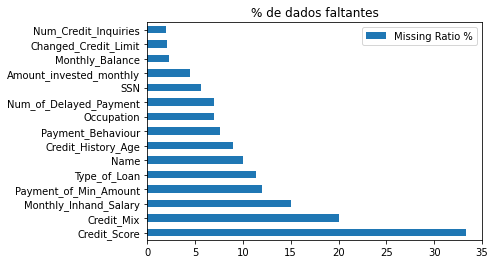

In [16]:
plot_nas(df_total)

In [17]:
# convertendo Credit_History_Age em quantidade de meses
def converter_mes(x):
    if pd.notnull(x):
        ano = int(x.split(' ')[0])
        mes = int(x.split(' ')[3])
        return (ano*12)+mes
    else:
        return x

df_total['Credit_History_age'] = df_total['Credit_History_Age'].apply(lambda x: converter_mes(x)).astype(float)

In [27]:
df_total['Type_of_Loan_ajustado'] = df_total['Type_of_Loan'].replace("[abc]* and ", " ", regex=True)

In [43]:
# transformando as variaveis para o tipo que faz sentido

col_int = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment']
col_float = ['Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Delay_from_due_date', 
             'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
             'Amount_invested_monthly', 'Total_EMI_per_month']
col_cat = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# aplicando as type para variaveis int

df_total['Age'] = df_total['Age'].astype('int')
df_total['Num_Bank_Accounts'] = df_total['Num_Bank_Accounts'].astype('int')
df_total['Num_Credit_Card'] = df_total['Num_Credit_Card'].astype('int')
df_total['Num_of_Loan'] = df_total['Num_of_Loan'].astype('int')
df_total['Num_of_Delayed_Payment'] = df_total['Num_of_Delayed_Payment'].astype('int', errors='ignore')

# float

df_total['Annual_Income'] = df_total['Annual_Income'].astype('float')
df_total['Monthly_Inhand_Salary'] = df_total['Monthly_Inhand_Salary'].astype('float')
df_total['Interest_Rate'] = df_total['Interest_Rate'].astype('float')
df_total['Delay_from_due_date'] = df_total['Delay_from_due_date'].astype('float')
df_total['Changed_Credit_Limit'] = df_total['Changed_Credit_Limit'].astype('float')
df_total['Num_Credit_Inquiries'] = df_total['Num_Credit_Inquiries'].astype('float')
df_total['Outstanding_Debt'] = df_total['Outstanding_Debt'].astype('float')
df_total['Credit_Utilization_Ratio'] = df_total['Credit_Utilization_Ratio'].astype('float')
df_total['Amount_invested_monthly'] = df_total['Amount_invested_monthly'].astype('float')
df_total['Total_EMI_per_month'] = df_total['Total_EMI_per_month'].astype('float')

# object

df_total['Occupation'] = df_total['Occupation'].astype('object')
df_total['Credit_Mix'] = df_total['Credit_Mix'].astype('object')
df_total['Payment_of_Min_Amount'] = df_total['Payment_of_Min_Amount'].astype('object')
df_total['Payment_Behaviour'] = df_total['Payment_Behaviour'].astype('object')

In [ ]:
# converter month para qtd meses e ver a media do cliente (?)

# agrupar informacoes por ID cliente

# converter campo Type_of_Loan em lista e indexar cada tipo de emprestimo